In [1]:
# ! swig -c++ -python swig/ising.i
# ! python swig/setup_ising.py build_ext --inplace

running build_ext
building '_ising' extension
gcc -pthread -B /apps/share64/debian7/anaconda/anaconda-6/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/apps/share64/debian7/anaconda/anaconda-6/include/python3.7m -c swig/ising_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/ising_wrap.o -I./ -std=c++11 -O3
cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++ [enabled by default]
swig/ising_wrap.cxx: In function ‘PyObject* PyInit__ising()’:
swig/ising_wrap.cxx:8826:21: warning: variable ‘md’ set but not used [-Wunused-but-set-variable]
gcc -pthread -B /apps/share64/debian7/anaconda/anaconda-6/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/apps/share64/debian7/anaconda/anaconda-6/include/python3.7m -c ising.cpp -o build/temp.linux-x86_64-3.7/ising.o -I./ -std=c++11 -O3
cc1plus: warning: command line option ‘-Wstrict-prototypes’ is val

In [2]:
# import sys
# import os
# sys.path.append( os.path.abspath("swig") )
# import ising
import numpy as np
import matplotlib.pyplot as plt
from DataReader import DataReader as dr
import pandas as pd
import seaborn as sn

In [3]:
RehnquistIdeology = dr.getRehnquist(ideology=True)
RehnquistMM = dr.getRehnquist(mm=True)

In [4]:
#Rehnquist
WRvotes_i = RehnquistIdeology[:,0]
#Stevens
JSvotes_i = RehnquistIdeology[:,1]
#OConnor
SOvotes_i = RehnquistIdeology[:,2]
#Scalia
ASvotes_i = RehnquistIdeology[:,3]
#Kennedy
AKvotes_i = RehnquistIdeology[:,4]
#Souter
DSvotes_i = RehnquistIdeology[:,5]
#Thomas
CTvotes_i = RehnquistIdeology[:,6]
#Ginsburg
RGvotes_i = RehnquistIdeology[:,7]
#Breyer
SBvotes_i = RehnquistIdeology[:,8]

#Rehnquist
WRvotes_mm = RehnquistMM[:,0]
#Stevens
JSvotes_mm = RehnquistMM[:,1]
#OConnor
SOvotes_mm = RehnquistMM[:,2]
#Scalia
ASvotes_mm = RehnquistMM[:,3]
#Kennedy
AKvotes_mm = RehnquistMM[:,4]
#Souter
DSvotes_mm = RehnquistMM[:,5]
#Thomas
CTvotes_mm = RehnquistMM[:,6]
#Ginsburg
RGvotes_mm = RehnquistMM[:,7]
#Breyer
SBvotes_mm = RehnquistMM[:,8]

#cases = np.linspace(1,WRvotes.size,WRvotes.size)
#courtMean = np.mean(RehnquistIdeology, axis=1)

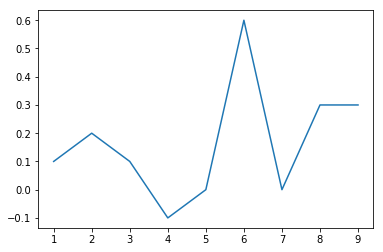

In [5]:
#Returns a number (generations) of randomly generated votes for a system of size numVotes (default is 9)
def randomVotes(generations, numVotes=9):
    return np.random.randint(-1, 2, size=(numVotes,generations))

gens = 10

u = np.zeros((gens,9))
v = randomVotes(gens)
x = np.linspace(1,9,9)
y = np.linspace(1,gens,gens)
# X,Y = np.meshgrid(x,y)

# plt.figure(dpi=150)
# plt.quiver(X,Y, u, v, scale=4.5*gens, )
# plt.xlim([0.25,9.5])
# plt.ylim([0.25,gens+0.5])
# plt.xlabel("Justice")
# plt.ylabel("Case")
# plt.xticks(np.linspace(1,9,9))
# plt.yticks(np.linspace(1,gens,gens))

# plt.show()

m = np.mean(v, axis=1)

plt.plot(x, m)
plt.show()

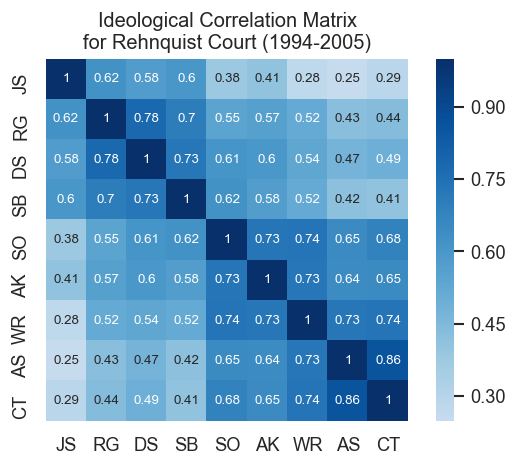

In [6]:
sn.set(style="white")

data1 = {'JS': JSvotes_i,
        'RG': RGvotes_i,
        'DS': DSvotes_i,
        'SB': SBvotes_i,
        'SO': SOvotes_i,
        'AK': AKvotes_i,
        'WR': WRvotes_i,
        'AS': ASvotes_i,
        'CT': CTvotes_i
       }

df1 = pd.DataFrame(data1,columns=['JS','RG','DS','SB','SO','AK','WR','AS','CT'])
C = df1.astype(int).corr()

plt.figure(dpi=120)
plt.title("Ideological Correlation Matrix\nfor Rehnquist Court (1994-2005)")
sn.heatmap(C, annot=True, cmap='Blues',square=True,annot_kws={"size": 8},center=0.5)
plt.show()

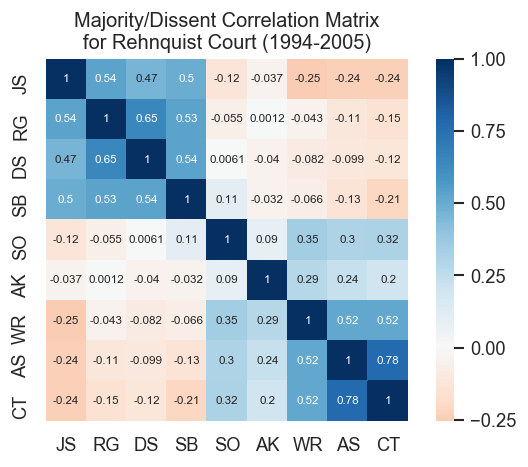

In [7]:
sn.set(style="white")

data2 = {'JS': JSvotes_mm,
        'RG': RGvotes_mm,
        'DS': DSvotes_mm,
        'SB': SBvotes_mm,
        'SO': SOvotes_mm,
        'AK': AKvotes_mm,
        'WR': WRvotes_mm,
        'AS': ASvotes_mm,
        'CT': CTvotes_mm
       }

df2 = pd.DataFrame(data2,columns=['JS','RG','DS','SB','SO','AK','WR','AS','CT'])
MD = df2.astype(int).corr()

plt.figure(dpi=120)
plt.title("Majority/Dissent Correlation Matrix\nfor Rehnquist Court (1994-2005)")
sn.heatmap(MD, annot=True, cmap='RdBu',center=0,square=True,annot_kws={"size": 7})
plt.show()

Equation 1: $S[P(\{\sigma_i\})]=-\sum_{\{\sigma_i\}}P(\{\sigma_i\})\ln{P(\{\sigma_i\})}$

Equation 2: $\sum_{\{\sigma_k\}}P(\{\sigma_k\})\sigma_i\sigma_j=C_{ij}$

Equation 3: $P(\{\sigma_i\})=\frac{1}{Z}e^{-E(\{\sigma_i\})}$

Equation 4: $E(\{\sigma_i\})=-\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j$

From appendix we have: $Z=\sum_{\{\sigma_i\}}e^{-E(\{\sigma_i\})}=>Z=\sum_{\{\sigma_i\}}e^{\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j}$


Want the interaction term, $J_{ij}$


Solving Equation 3 for $E(\{\sigma_i\})$: 

$E(\{\sigma_i\})=-\ln{(Z\cdot P(\{\sigma_i\}))}$

Now plug in Equation 4:

$-\ln{(Z\cdot P(\{\sigma_i\}))}=-\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j$

$2\ln{((\sum_{\{\sigma_i\}}e^{\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j})\cdot P(\{\sigma_i\}))}=\sum_{i\neq j}J_{ij}\sigma_i\sigma_j$

In [8]:
C_adj = np.empty((9,9,463)) # C_ij / sigma_i sigma_j

votes = df1.values.T

for i in range(9):
    for t in range(463):
        for j in range(9):
            sigma_i = votes[i,t]
            sigma_j = votes[j,t]
            prod = sigma_i*sigma_j
            C_adj[i,j,t] = C.values[i,j]/prod


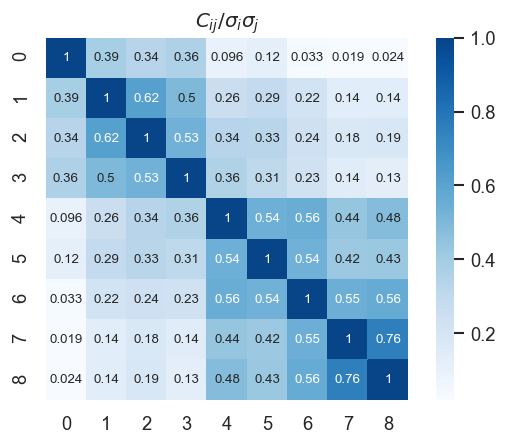

In [9]:
C_adj_avg = np.empty((9,9))

for i in range(9):
    for j in range(9):
        Csum = 0
        for t in range(463):
            Csum += C_adj[i,j,t]
        C_adj_avg[i,j] = Csum/463

plt.figure(dpi=120)
plt.title("$C_{ij}/\sigma_i \sigma_j$")
sn.heatmap(C_adj_avg, annot=True, cmap='Blues',square=True,annot_kws={"size": 8},center=0.55)
plt.show()

$\frac{C_{ij}}{\sigma_1\sigma_j}=\frac{1}{2}J_{ij}\sigma_i\sigma_j-\ln{Z}$

For a given Justice $i=0$'s interactions on all other Justices, $j$:

$\frac{C_{0j}}{\sigma_1\sigma_j}=\frac{1}{2}J_{0j}\sigma_0\sigma_j-\ln{Z}$

where

$Z=\sum_{\{\sigma_i\}}e^{\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j}$

Need to solve for $J$ with fsolve

In [10]:
#Intialize
L = 9 # of spins
J = 1.0
N = 100
T = 1.
H = 0.
MCSteps = 1000

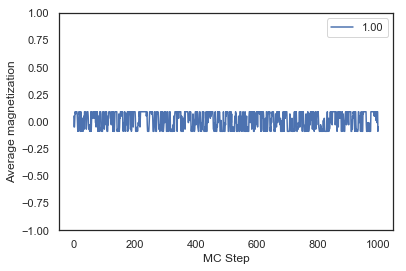

In [11]:
# eAvgVals = []
# mAvgVals = []
# i = ising.Ising(J, L, N, T, H)
# i.run(MCSteps)
# mvals = i.get_mvals()
# evals = i.get_evals()
# plt.plot(mvals, label="%3.2f" % (T))
# eAvgVals.append( i.get_eAvg() )
# mAvgVals.append( i.get_mAvg() )

# plt.legend()
# plt.ylim(-1,1)
# plt.xlabel("MC Step")
# plt.ylabel("Average magnetization")
# plt.show()

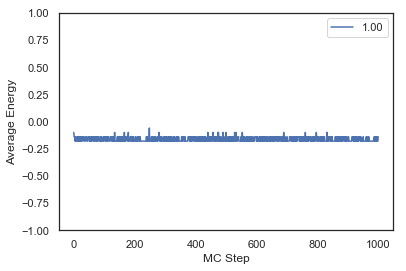

In [12]:
# plt.plot(evals, label="%3.2f" % (T))
# plt.legend()
# plt.ylim(-1,1)
# plt.xlabel("MC Step")
# plt.ylabel("Average Energy")
# plt.show()

In [13]:
import scipy.optimize as o

## Equation 23: $\sum_{\{\sigma_k\}}\sigma_a\sigma_b\frac{1}{Z}e^{\frac{1}{2}\sum_{ij}J_{ij}\sigma_i\sigma_j}=<\sigma_a\sigma_b>_{expt.}$

## where $<\sigma_a\sigma_b>_{expt.}=C_{ab}$ and $Z=\sum_{\{\sigma_i\}}e^{\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j}$

## Rearrange:

## $\sum_{\{\sigma_k\}}\sigma_a\sigma_b\frac{1}{Z}e^{\frac{1}{2}\sum_{ij}J_{ij}\sigma_i\sigma_j}-C_{ab}=0$

In [51]:
# def func(J, sigma, C):
#     result = []
#     J = J.reshape(9,9)
#     Z = 0
    
#     # Calculate Z
#     for i in range(9):
#         expVal = 0
#         for j in range(i+1,9):
#             expVal += J[i,j]*sigma[i]*sigma[j]
            
#     Z=np.exp(0.5*expVal)
    
    
#     term1 = 0
#     #Calculate sum over sigma_k
#     for a in range(9):
        
#         expVal = 0
#         for b in range(9):
            
#             prod = sigma[a]*sigma[b]
            
#             for c in range(b+1,9):
#                 expVal+=J[b,c]*sigma[b]*sigma[c]
                
#             term1+=(1/Z)*prod*np.exp(0.5*expVal)
            
#             result.append(term1-C[a,b])
    
#     return result

def func(J, sigma, C):
    result = []
    J = J.reshape(9,9)
    Z = 0
    
    # Calculate Z
    for i in range(9):
        expVal = 0
        for j in range(9):
            if(i==j): expVal+=0
            else: expVal += J[i,j]*sigma[i]*sigma[j]
            
    Z=np.exp(0.5*expVal)
    
    
    term1 = 0
    #Calculate sum over sigma_k
    for a in range(9):
        
        expVal = 0
        for b in range(9):
            
            prod = sigma[a]*sigma[b]
            
            for c in range(9):
                if(b==c): expVal+=0
                else: expVal+=J[b,c]*sigma[b]*sigma[c]
                
            term1+=(1/Z)*prod*np.exp(0.5*expVal)
            
            result.append(term1-C[a,b])
    
    return result

In [57]:
sigma_avg = []

for i in range(9):
    sigma_avg.append(np.average(list(votes[i,:])))

J0 = np.zeros((9,9))
J0.fill(0)
J0[np.diag_indices_from(J0)] = 0.

sols = []
for t in range(463):
    a = (votes[:,t],C.values)
    sol = o.fsolve(func,J0,args=a,factor=10)
    sols.append(sol)
    J0=sol.reshape(9,9)
    #J0[np.diag_indices_from(J0)] = 0.


/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


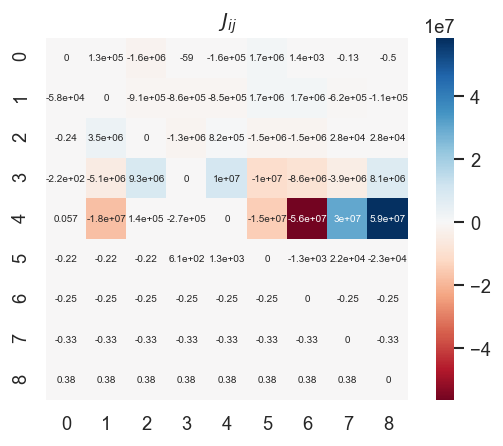

In [56]:
plt.figure(dpi=120)
plt.title("$J_{ij}$")
sn.heatmap(sols[-1].reshape(9,9), annot=True, cmap='RdBu',square=True,annot_kws={"size": 6},center=0)
plt.show()

In [ ]:
result_avg = np.mean(results,axis=0)
result_avg = result_avg.reshape(9,9)

plt.figure(dpi=120)
plt.title("$J_{ij}$")
sn.heatmap(result_avg, annot=True, cmap='RdBu',square=True,annot_kws={"size": 8})
plt.show()

plt.figure(dpi=120)
plt.title("$J_{ij}$")
sn.heatmap(results[0].reshape(9,9), annot=True, cmap='RdBu',square=True,annot_kws={"size": 8})
plt.show()

In [ ]:
plt.figure(dpi=120)
plt.title("$J_{ij}$")
sn.heatmap(Jresult, annot=True, cmap='RdBu',square=True,annot_kws={"size": 8})
plt.show()

In [ ]:
# def func(J, sigma_avg, C_adj_avg):
#     # J is 9x9
#     #J, sigma_avg, C_adj_avg = x
#     #Z = Z(J,sigma_avg)
#     J = J.reshape(9,9)
#     Z = 0
    
#     for i in range(9):
#         expVal = 0
#         for j in range(9):
#             expVal += J[i,j]*sigma_avg[i]*sigma_avg[j]
#         Z+=np.exp(0.5*expVal)

#     term1 = np.empty((9,9))
    
#     for i in range(9):
#         for j in range(9):
#             term1[i,j]=0.5*J[i,j]*sigma_avg[i]*sigma_avg[j]
#             Z+=np.exp(0.5*J[i,j]*sigma_avg[i]*sigma_avg[j])
#     term2 = np.log(Z)
#     term3 = C_adj_avg
#     result = term1 - term2 - term3
#     return result.reshape(81)